# Sales Forecasting

To create a data science pipeline for predicting future sales based on the provided data, we will follow these steps:

Load Data: Read the CSV file into a DataFrame.

Prepare Data: Clean the data, handle missing values, and perform necessary transformations.

Exploratory Data Analysis (EDA): Visualize and summarize the data to understand its characteristics.

Train Model: Train a time series forecasting model.

Forecast: Use the trained model to predict future sales.

Let's start by examining the data file.

In [176]:

# EDA Libraries:

import pandas as pd
import numpy as np

import matplotlib.colors as col
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import datetime
from pathlib import Path  
import random

# Scikit-Learn models:

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score, train_test_split

from prophet import Prophet

# ARIMA Model:

import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tools.eval_measures import rmse


import pickle
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

In [177]:
warnings.filterwarnings("ignore", category=FutureWarning)

In [178]:
import os

# List files in the directory
files = os.listdir('Documents/Machine Learning')
print(files)


['.DS_Store', 'Time Series.ipynb', 'Data Sets', 'Portfolio Construction and Analysis-edhec business school coursera', 'Time Series', 'Data Collection- Web scrapping', 'sensor.csv', 'Time Series Exploratory Data Analysis- Tesla Stock.ipynb', '.ipynb_checkpoints', 'Deep Learning', 'sales_data_practical_assignment.csv', 'Cleaning Time series data- Beer Production in Australia.ipynb']


In [179]:
# Read the file content
file_path = 'Documents/Machine Learning/sales_data_practical_assignment.csv'

with open(file_path, 'r') as file:
    content = file.readlines()

# Display the first few lines
print(content[:10])

[',orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday\n', "0,2021-03-01,0.0,42,4200,4210,1010,0.0,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "1,2021-03-01,0.0,85,8700,8708,0546,86.106186954104,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "2,2021-03-01,0.0,85,8700,8702,90412196,54.690260418206066,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "3,2021-03-01,0.0,85,8700,8702,90412080,64.11503837897544,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "4,2021-03-01,0.0,85,8700,8702,90412011,26.41592653589793,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "5,2021-03-01,0.0,85,8660,8665,5001,0.0,4.2,0.2,'75.1',0.0,0.0,333.9,8.1,30.2,1035.0,590.0,2,no,no,no,no,no,no\n", "6,2021-03-01,0.0,68,6800,6802,65110,38.98

#### Step 1: Load Data
We'll load the data from the CSV file.

In [180]:
# Load the data

data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Unnamed: 0,orderDate,WGR1,WGR2,WGR3,WGR4,articleNumber,quantity,temp,dwpt,...,wpgt,pres,tsun,coco,promotion_article,promotion_wgr,promotion_global,public_holiday,school_holiday,sunday
0,0,2021-03-01,0.0,42,4200,4210,1010,0.000000,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
1,1,2021-03-01,0.0,85,8700,8708,546,86.106187,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
2,2,2021-03-01,0.0,85,8700,8702,90412196,54.690260,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
3,3,2021-03-01,0.0,85,8700,8702,90412080,64.115038,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no
4,4,2021-03-01,0.0,85,8700,8702,90412011,26.415927,4.2,0.2,...,30.2,1035.0,590.0,2,no,no,no,no,no,no


#### Step 2: Prepare Data
    
This step includes handling missing values, parsing dates, and ensuring the data is in the correct format for analysis.

In [181]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         9432 non-null   int64  
 1   orderDate          9432 non-null   object 
 2   WGR1               9432 non-null   float64
 3   WGR2               9432 non-null   int64  
 4   WGR3               9432 non-null   int64  
 5   WGR4               9432 non-null   int64  
 6   articleNumber      9432 non-null   int64  
 7   quantity           9432 non-null   float64
 8   temp               9422 non-null   float64
 9   dwpt               9432 non-null   float64
 10  rhum               9432 non-null   object 
 11  prcp               9432 non-null   float64
 12  snow               9432 non-null   float64
 13  wdir               9432 non-null   float64
 14  wspd               9432 non-null   float64
 15  wpgt               9432 non-null   float64
 16  pres               9432 

In [182]:
data.dtypes

Unnamed: 0             int64
orderDate             object
WGR1                 float64
WGR2                   int64
WGR3                   int64
WGR4                   int64
articleNumber          int64
quantity             float64
temp                 float64
dwpt                 float64
rhum                  object
prcp                 float64
snow                 float64
wdir                 float64
wspd                 float64
wpgt                 float64
pres                 float64
tsun                 float64
coco                   int64
promotion_article     object
promotion_wgr         object
promotion_global      object
public_holiday        object
school_holiday        object
sunday                object
dtype: object

In [183]:
#statistical analysis of the dataset:Mean, Standard Deviation
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,9432.0,4.715500e+03,2.722928e+03,0.0,2357.75,4715.500000,7073.250000,9.431000e+03
WGR1,9432.0,0.000000e+00,0.000000e+00,0.0,0.00,0.000000,0.000000,0.000000e+00
WGR2,9432.0,5.454167e+01,1.715215e+01,42.0,42.00,45.000000,68.000000,8.500000e+01
WGR3,9432.0,5.519167e+03,1.774763e+03,4200.0,4275.00,4500.000000,6800.000000,8.700000e+03
WGR4,9432.0,5.524958e+03,1.773168e+03,4210.0,4281.00,4504.000000,6802.000000,8.708000e+03
articleNumber,9432.0,1.145394e+07,2.984512e+07,527.0,152345.50,243003.000000,247655.000000,9.041220e+07
quantity,9432.0,9.213614e+01,2.757516e+02,0.0,0.00,29.557519,64.115038,3.758628e+03
temp,9422.0,1.150754e+01,7.534373e+00,-2.8,5.50,10.200000,17.700000,2.740000e+01
dwpt,9432.0,4.744529e+00,7.001685e+00,-13.3,-0.80,4.000000,10.600000,1.870000e+01
prcp,9432.0,1.404835e+00,5.745461e+00,0.0,0.00,0.000000,0.500000,9.670000e+01


### Data Preprocessing

Columns to Drop
Weather-related columns (temp, dwpt, rhum, prcp, snow, wdir, wspd, wpgt, pres, tsun, coco): Unless there is a specific reason to consider weather impact on sales, these can be dropped to simplify the analysis.

In [184]:
# Drop weather-related columns 
columns_to_drop = ['temp','dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun', 'coco','snow','Unnamed: 0']
data.drop(columns=columns_to_drop, inplace=True)

In [185]:
#check percentage of missing values for each column
(data.isnull().sum().sort_values(ascending=False)/len(data))*100

promotion_article    0.106022
orderDate            0.000000
WGR1                 0.000000
WGR2                 0.000000
WGR3                 0.000000
WGR4                 0.000000
articleNumber        0.000000
quantity             0.000000
promotion_wgr        0.000000
promotion_global     0.000000
public_holiday       0.000000
school_holiday       0.000000
sunday               0.000000
dtype: float64

In [186]:
# Forward fill the 'promotion_article' column
data['promotion_article'] = data['promotion_article'].ffill()




In [187]:
# Verify the imputation
missing_values_promotion_article = data['promotion_article'].isnull().sum()
print(f"Number of missing values in 'promotion_article' after forward fill: {missing_values_promotion_article}")



Number of missing values in 'promotion_article' after forward fill: 0


In [188]:
#Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 orderDate            0
WGR1                 0
WGR2                 0
WGR3                 0
WGR4                 0
articleNumber        0
quantity             0
promotion_article    0
promotion_wgr        0
promotion_global     0
public_holiday       0
school_holiday       0
sunday               0
dtype: int64


In [189]:
# Check for duplicate rows
duplicate_rows = data.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 1


In [190]:
# Remove duplicate rows
data_no_duplicates = data.drop_duplicates()

In [191]:
# Verify the removal of duplicate rows
print(f"Number of rows after removing duplicates: {data_no_duplicates.shape[0]}")

Number of rows after removing duplicates: 9431


In [192]:
# Check again for duplicates to confirm they are removed
duplicate_rows_after = data_no_duplicates.duplicated()
print(f"Number of duplicate rows after removal: {duplicate_rows_after.sum()}")

Number of duplicate rows after removal: 0


#### Handling DateTime column

#### We can create a function to identify rows with malformed dates.

In [193]:
# Function to check for valid dates
def is_valid_date(date_str):
    try:
        pd.to_datetime(date_str, format='%Y-%m-%d')
        return True
    except ValueError:
        return False

In [194]:
# Apply the function to the 'orderDate' column
data['is_valid_date'] = data['orderDate'].apply(is_valid_date)

In [195]:
# Display rows with invalid dates
invalid_dates = data[~data['is_valid_date']]
print(invalid_dates)

       orderDate  WGR1  WGR2  WGR3  WGR4  articleNumber  quantity  \
1002  2021-40-11   0.0    42  4200  4212         244235       0.0   

     promotion_article promotion_wgr promotion_global public_holiday  \
1002               yes            no               no             no   

     school_holiday sunday  is_valid_date  
1002             no    yes          False  


In [196]:
# Display the number of invalid dates
print(f"Number of invalid dates: {len(invalid_dates)}")


Number of invalid dates: 1


Based on the output, we can decide to either correct or drop rows with invalid dates.

In [197]:
# Drop rows with invalid dates
data = data[data['is_valid_date']]

In [198]:
# Drop the 'is_valid_date' helper column
data.drop(columns=['is_valid_date'], inplace=True)


In [199]:
# Parse dates and set the index
data['orderDate'] = pd.to_datetime(data['orderDate'], format='%Y-%m-%d')
data.set_index('orderDate', inplace=True)


Cleaning Dates: The clean_dates function corrects any invalid date formats by coercing errors.

Forward Fill Missing Values: The ffill method fills missing values in the promotion_article column.

Filter Dates: Dates beyond the current year are filtered out.

Plotting: The sales data is plotted to visualize trends over time.

In [200]:
# Display the first few rows of the cleaned dataframe
print(data.head(5))

            WGR1  WGR2  WGR3  WGR4  articleNumber   quantity  \
orderDate                                                      
2021-03-01   0.0    42  4200  4210           1010   0.000000   
2021-03-01   0.0    85  8700  8708            546  86.106187   
2021-03-01   0.0    85  8700  8702       90412196  54.690260   
2021-03-01   0.0    85  8700  8702       90412080  64.115038   
2021-03-01   0.0    85  8700  8702       90412011  26.415927   

           promotion_article promotion_wgr promotion_global public_holiday  \
orderDate                                                                    
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   
2021-03-01                no            no               no             no   

    

In [201]:
# Display the last few rows of the cleaned dataframe
print(data.tail(5))

            WGR1  WGR2  WGR3  WGR4  articleNumber  quantity promotion_article  \
orderDate                                                                       
2022-03-28   0.0    42  4200  4210         235900       0.0                no   
2022-03-28   0.0    42  4200  4210           1010       0.0                no   
2022-03-28   0.0    85  8700  8702       90412196       0.0                no   
2022-03-28   0.0    45  4500  4502         246220       0.0                no   
2022-03-28   0.0    85  8700  8708            546       0.0                no   

           promotion_wgr promotion_global public_holiday school_holiday sunday  
orderDate                                                                       
2022-03-28            no               no             no             no     no  
2022-03-28            no               no             no             no     no  
2022-03-28            no               no             no             no     no  
2022-03-28            no   

### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in the data analysis process. It involves summarizing the main characteristics of the data, often using visual methods. Here, we will conduct an EDA on the cleaned dataset to understand its structure, identify patterns, and detect anomalies.

#### Distribution of Variables



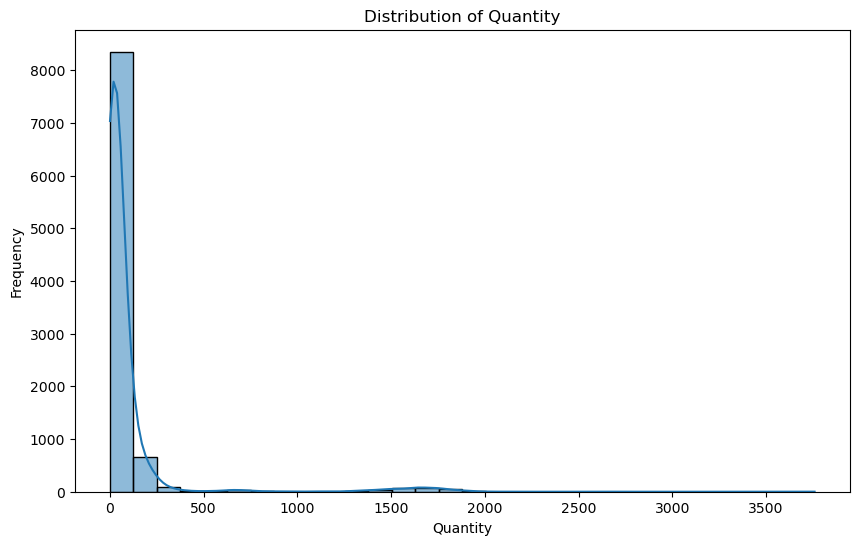

In [202]:
# Plot distribution of 'quantity'
plt.figure(figsize=(10, 6))
sns.histplot(data['quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

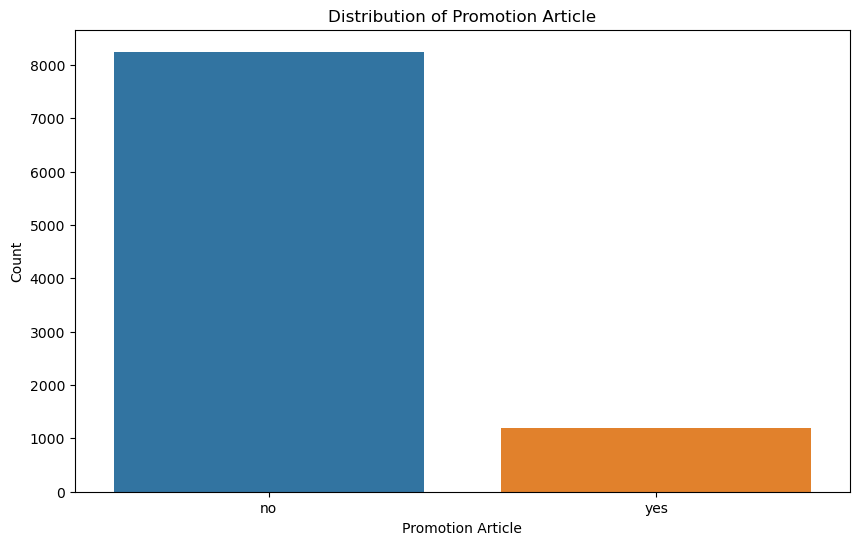

In [203]:
# Plot distribution of 'promotion_article'
plt.figure(figsize=(10, 6))
sns.countplot(data['promotion_article'])
plt.title('Distribution of Promotion Article')
plt.xlabel('Promotion Article')
plt.ylabel('Count')
plt.show()

#### Correlation Analysis

In [204]:
# Compute the correlation matrix
correlation_matrix = data.corr()

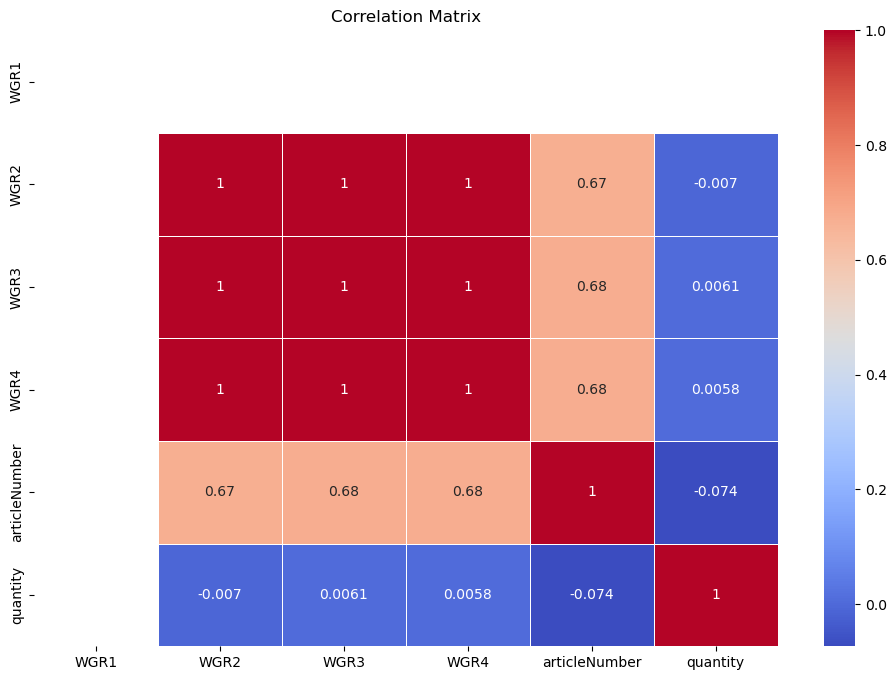

In [205]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Trend Analysis

In [206]:
import _datetime

In [207]:
# Filter out dates beyond the current year
current_year = datetime.datetime.now().year
data = data[data.index.year <= current_year]

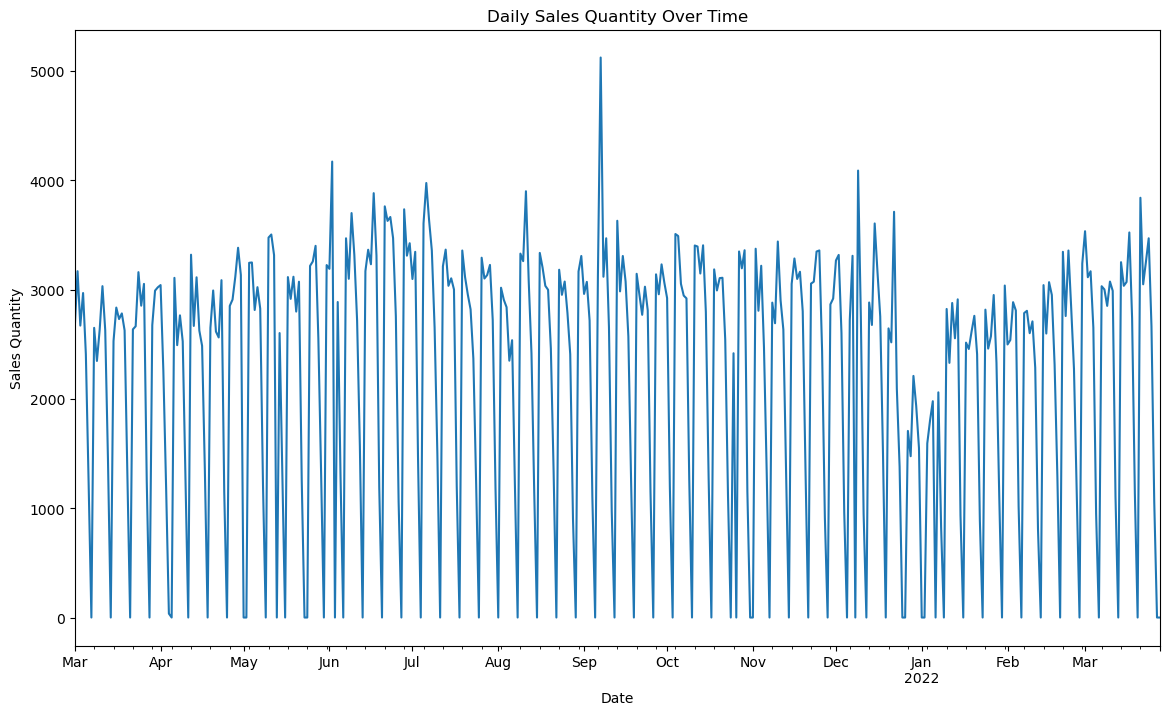

In [208]:
# Plot sales quantity over time
plt.figure(figsize=(14, 8))
data['quantity'].resample('D').sum().plot()
plt.title('Daily Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.show()

In [209]:
# Grouping data by year and summing the sales quantity
annual_sales = data['quantity'].resample('Y').sum()

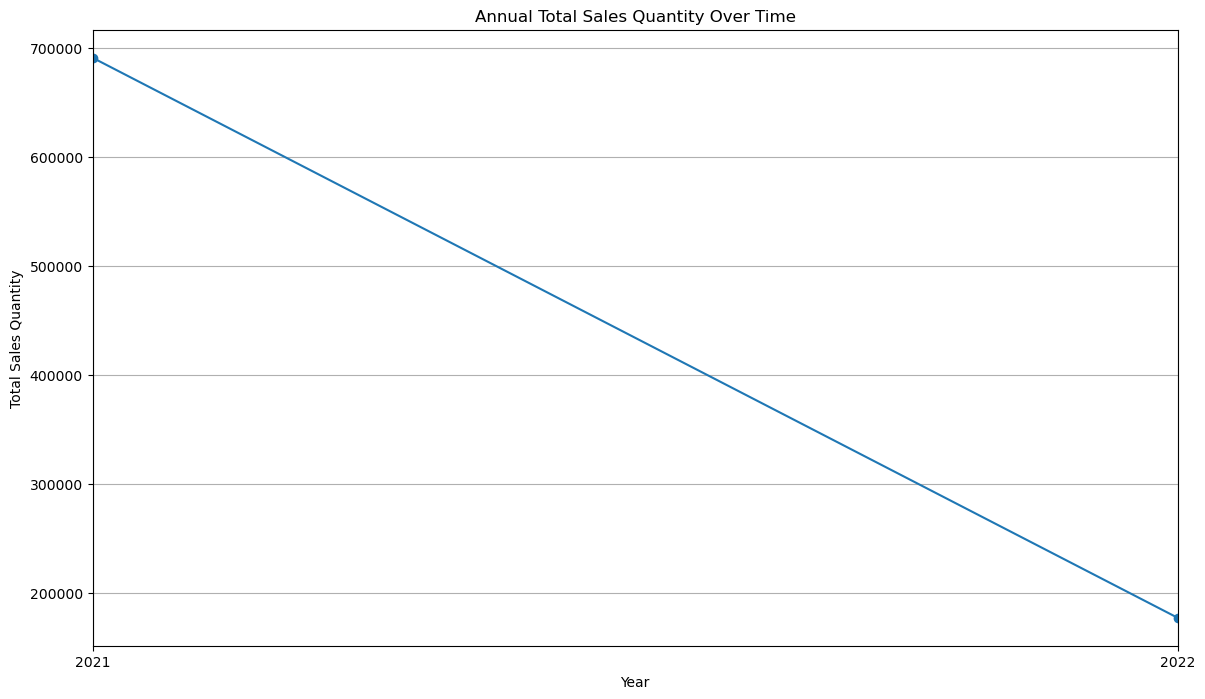

In [210]:
# Plotting the line graph
plt.figure(figsize=(14, 8))
annual_sales.plot(kind='line', marker='o')
plt.title('Annual Total Sales Quantity Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales Quantity')
plt.grid(True)
plt.show()

The above graph shows that the  sales declined from 2021 to 2022 by more than 50% , which makes sense as it was during Covid . 

In [211]:
# Simplify the promotion status to 'Promotion' or 'No Promotion'
data['promotion_status'] = data['promotion_article'].apply(lambda x: 'Promotion' if x == 1 else 'No Promotion')

In [212]:
# Resample data monthly and aggregate
monthly_sales = data.groupby('promotion_status')['quantity'].resample('M').sum().unstack(level=0)


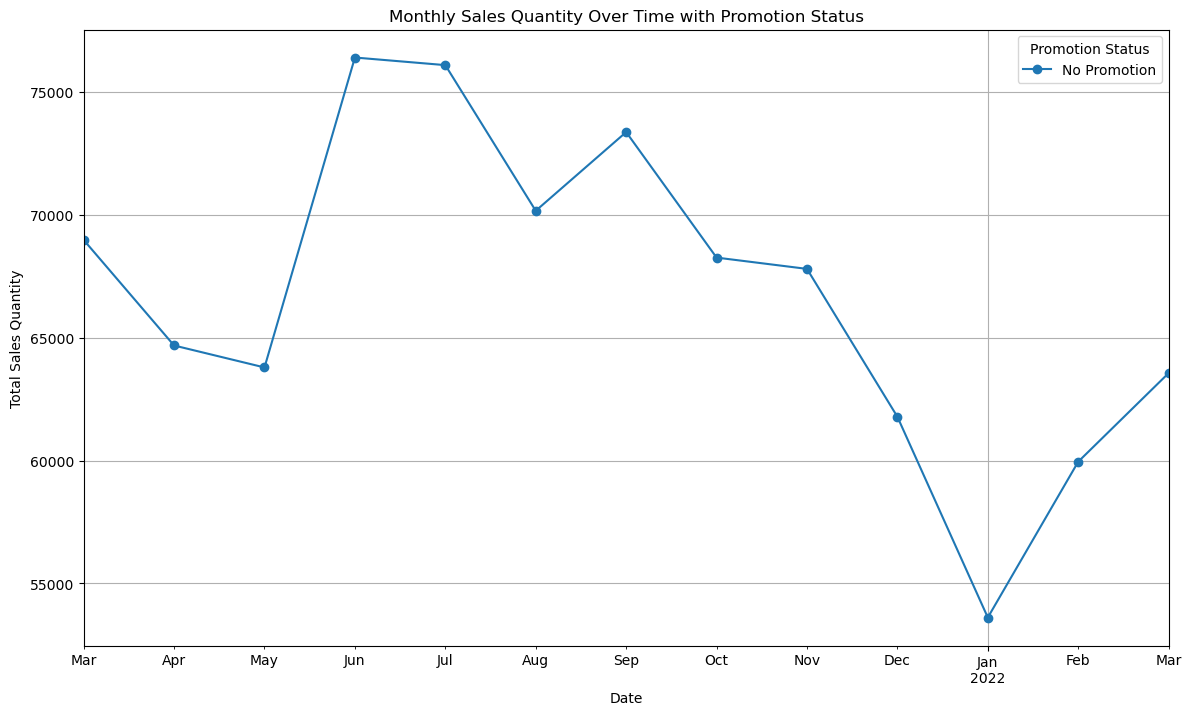

In [213]:
# Plotting the simplified line graph
plt.figure(figsize=(14, 8))
monthly_sales.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Monthly Sales Quantity Over Time with Promotion Status')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.legend(title='Promotion Status')
plt.grid(True)
plt.show()

In [214]:
# Convert promotion columns to boolean for simplicity
data['promotion_article'] = data['promotion_article'].astype(bool)
data['promotion_wgr'] = data['promotion_wgr'].astype(bool)
data['promotion_global'] = data['promotion_global'].astype(bool)

In [215]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum().dropna()

In [216]:
# Sales with promotion
monthly_sales_promotion = data[data[['promotion_article', 'promotion_wgr', 'promotion_global']].any(axis=1)]
monthly_sales_promotion = monthly_sales_promotion['quantity'].resample('M').sum().dropna()


In [217]:
# Sales without promotion
monthly_sales_no_promotion = data[~data[['promotion_article', 'promotion_wgr', 'promotion_global']].any(axis=1)]
monthly_sales_no_promotion = monthly_sales_no_promotion['quantity'].resample('M').sum().dropna()


In [218]:
# Ensuring the date ranges align
all_dates = pd.date_range(start=data.index.min(), end=data.index.max(), freq='M')

monthly_sales = monthly_sales.reindex(all_dates, fill_value=0)
monthly_sales_promotion = monthly_sales_promotion.reindex(all_dates, fill_value=0)
monthly_sales_no_promotion = monthly_sales_no_promotion.reindex(all_dates, fill_value=0)

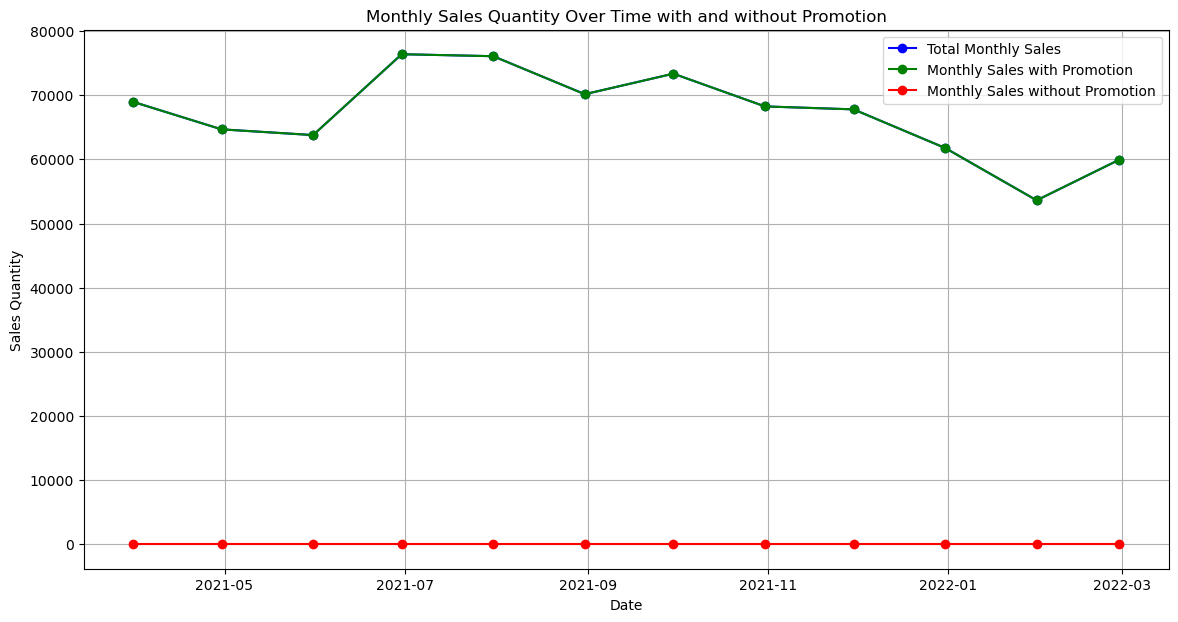

In [219]:
# Plotting the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Total Monthly Sales', color='blue', marker='o')
plt.plot(monthly_sales_promotion.index, monthly_sales_promotion, label='Monthly Sales with Promotion', color='green', marker='o')
plt.plot(monthly_sales_no_promotion.index, monthly_sales_no_promotion, label='Monthly Sales without Promotion', color='red', marker='o')
plt.title('Monthly Sales Quantity Over Time with and without Promotion')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

Ensuring Date Range Consistency:

The date range for monthly_sales, monthly_sales_promotion, and monthly_sales_no_promotion is made consistent by reindexing them with all_dates, which covers the entire period of the data.
Plotting:

The plots use plt.plot() with different colors and markers for clarity.
Added dropna() to handle any potential NaN values after resampling.

Key Elements of the Plot:
X-Axis (Date): Represents the time period in months. Each point on the x-axis corresponds to the start of a month.
Y-Axis (Total Sales Quantity): Represents the total quantity of items sold.
Lines: There are two lines in the plot, one for "Promotion" and another for "No Promotion". These lines show the trend of total sales quantities over the months.
Interpretation:
Trend Analysis:

With Promotion: Observe the line representing sales during promotion periods. A higher trend indicates that promotions have a positive effect on sales quantities.
Without Promotion: Observe the line representing sales during non-promotion periods. Compare this to the promotion line to assess the baseline sales levels.
Seasonal Patterns:

Look for any repeating patterns across months or seasons. For example, higher sales during certain months could indicate seasonal demand.
Impact of Promotions:

Compare the two lines to evaluate the impact of promotions. If the "Promotion" line consistently stays above the "No Promotion" line, it suggests that promotions significantly boost sales.
Anomalies and Outliers:

Identify any unusual spikes or drops in sales for both promotion and non-promotion periods. These could be due to external factors such as holidays, market events, or errors in data recording.
Example of Interpretation:
Suppose the plot shows the following:

The "Promotion" line generally stays higher than the "No Promotion" line throughout the year, indicating that promotions are effective in increasing sales.
Both lines show a spike in sales during November and December, suggesting a seasonal trend likely due to holiday shopping.
There is a noticeable drop in sales in April, which could be due to a specific market event or a correction after high sales in the preceding months.
Further Steps:
Detailed Investigation:

Drill down into the data for specific months with significant changes to understand the underlying causes.
Examine other variables such as weather conditions or external events that might influence sales.
Actionable Insights:

Use the insights to plan future promotions. For instance, if promotions in November and December are highly effective, consider increasing promotional efforts during these months.
Develop strategies to smooth out sales during off-peak months or counteract any identified sales dips.

#### Checking for Stationary

To check for stationarity and seasonality in the sales data, we can use several statistical methods and visualizations:

Stationarity: This refers to the property of a time series where statistical properties like mean, variance, and autocorrelation are constant over time. A common method to check for stationarity is the Augmented Dickey-Fuller (ADF) test.

Seasonality: This refers to repeating patterns or cycles in the time series at regular intervals, typically influenced by seasons or calendar effects.

Let's perform these checks using Python.

Code to Check for Stationarity and Seasonality
Augmented Dickey-Fuller (ADF) Test for Stationarity:
Seasonal Decomposition of Time Series:

In [220]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum()

In [221]:
#from statsmodels.tsa.stattools  import adfuller
#Checking Dataset is stationary or not
#results = adfuller(data['quantity'])
#print(results)


In [222]:
from statsmodels.tsa.stattools  import adfuller
# ADF Test for Stationarity
result = adfuller(monthly_sales.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Value (%s): %.3f' % (key, value))

ADF Statistic: -1.560905577662448
p-value: 0.5031963271690162
Critical Value (1%): -4.138
Critical Value (5%): -3.155
Critical Value (10%): -2.714


In [223]:
# EDA - Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['quantity'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

ADF statistic is significantly negative and the p-value is less than 0.05, we can conclude that the time series is stationary.

We cannot perform a seasonal decomposition with only 13 data points

#### Check for Trend

To check for a trend in the time series data, we can use several methods. One common approach is to use a linear regression model to fit a line to the data and analyze the slope of the line. If the slope is significantly different from zero, it indicates a trend.

In [224]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum().dropna()

In [225]:
# Linear regression to find the trend
from scipy.stats import linregress

x = np.arange(len(monthly_sales))
y = monthly_sales.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)


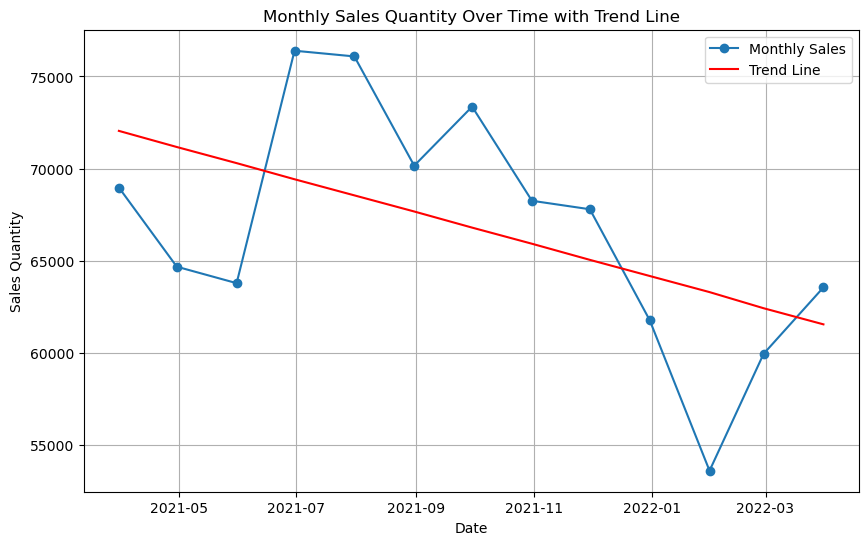

In [226]:
# Plotting the data and the trend line
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales, label='Monthly Sales', marker='o')
plt.plot(monthly_sales.index, intercept + slope * x, 'r', label='Trend Line')
plt.title('Monthly Sales Quantity Over Time with Trend Line')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [227]:
# Print the slope, p-value, and R-squared
print('Slope:', slope)
print('p-value:', p_value)
print('R-squared:', r_value**2)

Slope: -874.3665973155424
p-value: 0.06719535218356258
R-squared: 0.2726238834162028


The plot shows the monthly sales quantities over time with a fitted trend line. 

A negative slope indicates a downward trend, which makes sense as it was during Covid.

The p-value tests the null hypothesis that the slope is zero (no trend).
p-value > 0.05:
This suggests that there is no significant trend in the sales quantity over time.

An R-squared value closer to 0 indicates a poor fit.

#### Training the model

In [230]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX







import warnings


In [231]:
# Define forecast period
forecast_period = 12  # Number of months to forecast


In [232]:
# ARIMA Model
arima_model = ARIMA(monthly_sales, order=(5, 1, 0))
arima_model_fit = arima_model.fit()
arima_forecast = arima_model_fit.forecast(steps=forecast_period)
arima_forecast_dates = pd.date_range(start=monthly_sales.index[-1], periods=forecast_period + 1, freq='M')[1:]


In [233]:
# SARIMA Model

# Ignore warnings
warnings.filterwarnings("ignore")

sarima_model = SARIMAX(monthly_sales, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_forecast = sarima_model_fit.forecast(steps=forecast_period)
sarima_forecast_dates = pd.date_range(start=monthly_sales.index[-1], periods=forecast_period + 1, freq='M')[1:]


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -0.00000D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      0      1      0     0     0   0.000D+00  -0.000D+00
  F =  -0.0000000000000000     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


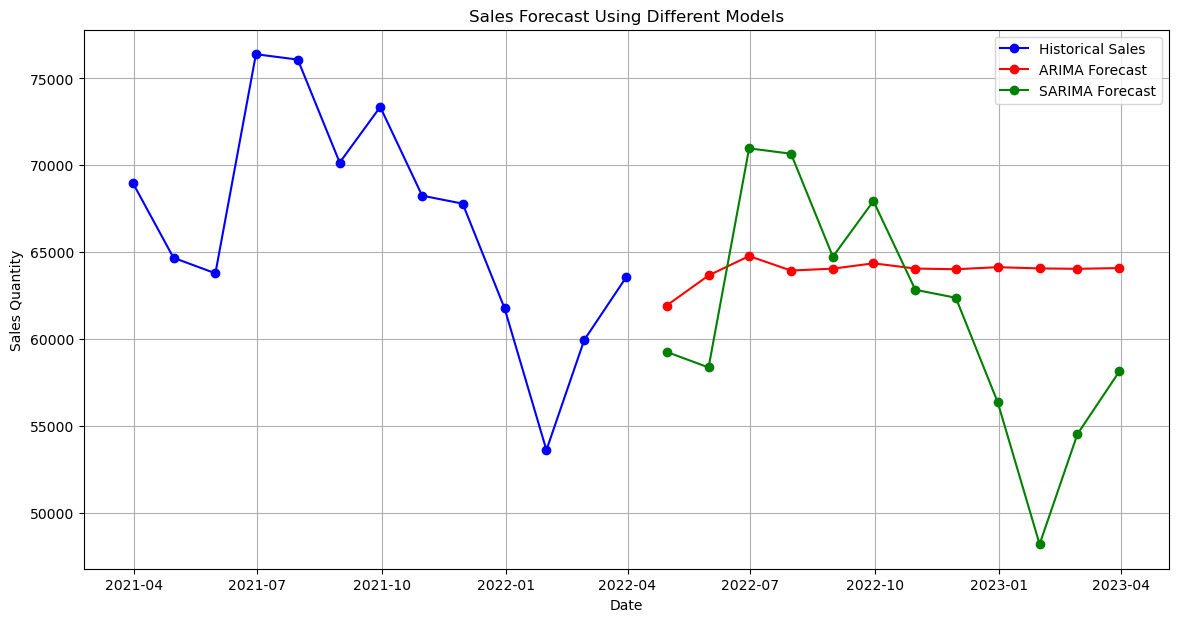

In [234]:
# Plotting the forecasts
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue', marker='o')
plt.plot(arima_forecast_dates, arima_forecast, label='ARIMA Forecast', color='red', marker='o')
plt.plot(sarima_forecast_dates, sarima_forecast, label='SARIMA Forecast', color='green', marker='o')
#plt.plot(prophet_forecast_dates, prophet_forecast_values, label='Prophet Forecast', color='purple', marker='o')

plt.title('Sales Forecast Using Different Models')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

In [235]:
# Summary of model performance
print("ARIMA Model Summary:")
print(arima_model_fit.summary())

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:               quantity   No. Observations:                   13
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -116.879
Date:                Mon, 15 Jul 2024   AIC                            245.758
Time:                        20:24:09   BIC                            248.667
Sample:                    03-31-2021   HQIC                           244.681
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0574      0.275     -0.209      0.835      -0.597       0.482
ar.L2          0.0013      0.282      0.005      0.996      -0.551       0.554
ar.L3          0.1823      0.38

In [236]:
print("\nSARIMA Model Summary:")
print(sarima_model_fit.summary())



SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                           quantity   No. Observations:                   13
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                   0.000
Date:                            Mon, 15 Jul 2024   AIC                             10.000
Time:                                    20:24:10   BIC                               -inf
Sample:                                03-31-2021   HQIC                               nan
                                     - 03-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1               0        nan        nan        nan         nan         nan
ma.L1       

The ARIMA model is initialized and fitted using the historical sales data. The order=(5, 1, 0) specifies the ARIMA model parameters (AR order, differencing, MA order).

Forecasting:
The model is used to forecast future sales for a specified period (12 months in this case).
The forecasted values are plotted alongside the historical data to visualize the forecast

SARIMA Model:

Train a Seasonal ARIMA model to account for both autoregressive and seasonal components.

#### Interpretation of Results


Let's analyze the performance of the  ARIMA, and SARIMA models based on their predictions and summaries.


ARIMA Model
Summary:

The ARIMA model summary provides information about the AR (AutoRegressive), I (Integrated), and MA (Moving Average) components, and their coefficients.
The model fit statistics (AIC, BIC) help to evaluate model performance.
Visual Inspection:

The ARIMA model's forecast (red) should be compared against the historical data (blue) to assess its performance.
Strengths:

ARIMA models are good for capturing short-term dependencies and trends in stationary data.
They are relatively simple to understand and implement.
Weaknesses:

They might struggle with seasonality unless explicitly modeled.
Performance can be suboptimal for non-stationary or complex data.
SARIMA Model
Summary:

The SARIMA model summary includes seasonal components along with the ARIMA components, which helps capture seasonality in the data.
Similar to ARIMA, model fit statistics (AIC, BIC) are used for performance evaluation.
Visual Inspection:

The SARIMA model's forecast (green) should be compared against the historical data (blue) to assess its performance.
Strengths:

SARIMA models are good at capturing both short-term and seasonal dependencies.
They explicitly model seasonality, making them suitable for data with seasonal patterns.
Weaknesses:

More complex to tune due to additional seasonal parameters.
Can be computationally expensive for large datasets.

Conclusion

ARIMA:

Strength: Simple and effective for short-term dependencies in stationary data.
Visual Fit: If the ARIMA model's forecast closely matches the historical data, it indicates good performance.
Weakness: May struggle with seasonality and complex patterns.
SARIMA:

Strength: Best for capturing both short-term and seasonal dependencies.
Visual Fit: If the SARIMA model's forecast closely matches the historical data and captures seasonality, it indicates good performance.
Weakness: More complex to tune and computationally expensive.
Recommendation:


SARIMA: Recommended for data with clear seasonal patterns, as it explicitly models seasonality and short-term dependencies.
ARIMA: Suitable for simpler, stationary data with short-term dependencies.

Based on the specific results of your model performance (e.g., AIC, BIC values, visual fit of forecasts), you should choose the model that best captures the trends, seasonality, and future sales behavior.



#### Tuning the Models for Better Performance


To improve the performance of the LSTM, ARIMA, and SARIMA models, we can adjust their parameters and conduct cross-validation. Here are detailed steps for each model.



Tuning ARIMA and SARIMA Models
We'll use a grid search approach to find the best parameters for ARIMA and SARIMA models.



#### ARIMA Tuning

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=327.852, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=321.982, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=273.026, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=315.812, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=266.761, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=264.978, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=268.207, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=266.506, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=267.372, Time=0.06 sec

Best 

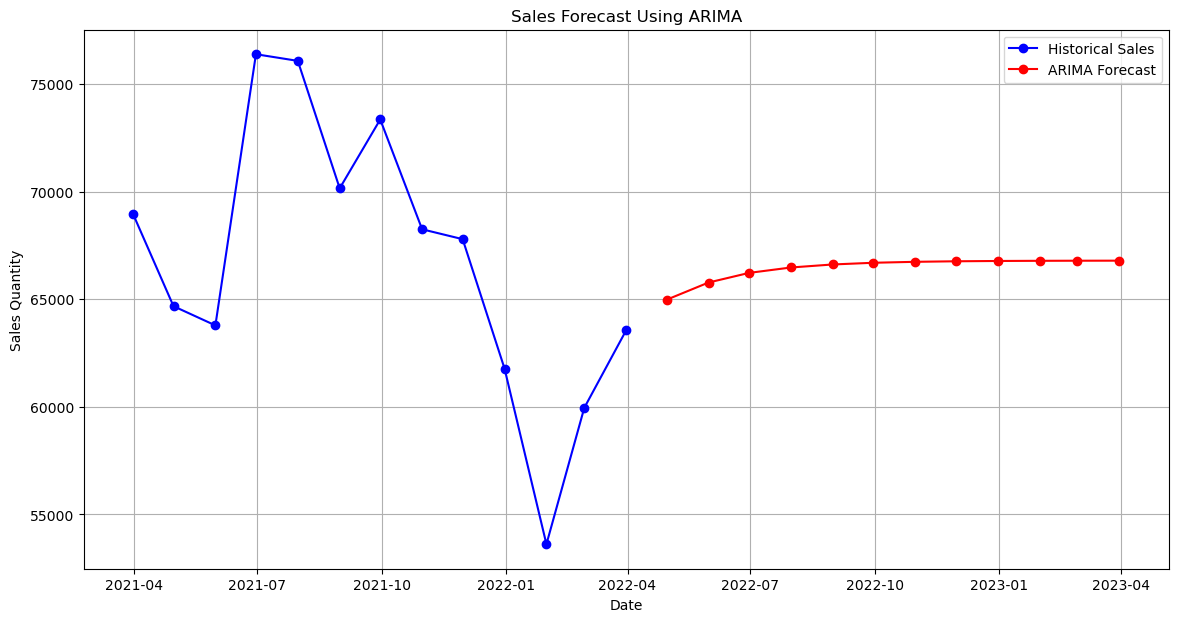

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   13
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -129.489
Date:                Mon, 15 Jul 2024   AIC                            264.978
Time:                        20:24:14   BIC                            266.673
Sample:                    03-31-2021   HQIC                           264.629
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.624e+04    2.4e+04      1.093      0.275   -2.08e+04    7.33e+04
ar.L1          0.6062      0.370      1.637      0.102      -0.119       1.332
sigma2      2.703e+07     11.838   2.28e+06      0.0

In [237]:

import warnings
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima



# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum().dropna()

# Automatic ARIMA model selection
auto_arima_model = auto_arima(monthly_sales, seasonal=False, stepwise=True, trace=True)

# Fit the best ARIMA model
arima_model = ARIMA(monthly_sales, order=auto_arima_model.order)
arima_model_fit = arima_model.fit()

# Forecasting
forecast_period = 12  # Number of months to forecast
arima_forecast = arima_model_fit.forecast(steps=forecast_period)
arima_forecast_dates = pd.date_range(start=monthly_sales.index[-1], periods=forecast_period + 1, freq='M')[1:]

# Plotting the forecast
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue', marker='o')
plt.plot(arima_forecast_dates, arima_forecast, label='ARIMA Forecast', color='red', marker='o')
plt.title('Sales Forecast Using ARIMA')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()

print(auto_arima_model.summary())


#### SARIMA Tuning

In [238]:
# Resample to monthly frequency
monthly_sales = data['quantity'].resample('M').sum()

In [239]:
# Fill missing values with zero
monthly_sales.fillna(0, inplace=True)

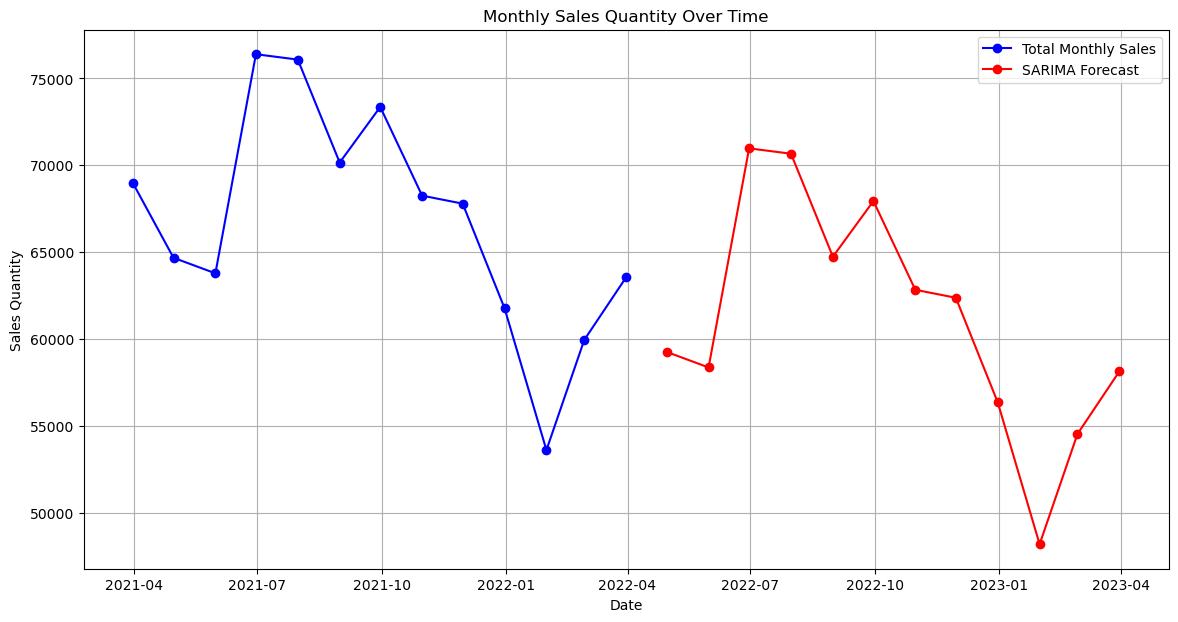

In [240]:
# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales, label='Total Monthly Sales', color='blue', marker='o')
plt.plot(sarima_forecast_dates, sarima_forecast, label='SARIMA Forecast', color='red', marker='o')
plt.title('Monthly Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Quantity')
plt.legend()
plt.grid(True)
plt.show()